In [1]:
from collections import defaultdict

def parseData(fname):
    for l in open(fname):
        yield eval(l)

## First, we explore the (user, items) list

In [2]:
print("Reading data...")
data_users_items = list(parseData("./australian_users_items.json"))
print("Done.")

Reading data...
Done.


In [3]:
print(data_users_items[0])

{'user_id': '76561197970982479', 'items_count': 277, 'steam_id': '76561197970982479', 'user_url': 'http://steamcommunity.com/profiles/76561197970982479', 'items': [{'item_id': '10', 'item_name': 'Counter-Strike', 'playtime_forever': 6, 'playtime_2weeks': 0}, {'item_id': '20', 'item_name': 'Team Fortress Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '30', 'item_name': 'Day of Defeat', 'playtime_forever': 7, 'playtime_2weeks': 0}, {'item_id': '40', 'item_name': 'Deathmatch Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '50', 'item_name': 'Half-Life: Opposing Force', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '60', 'item_name': 'Ricochet', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '70', 'item_name': 'Half-Life', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '130', 'item_name': 'Half-Life: Blue Shift', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '300', 'item_name': 'Day of Defeat: Source', '

The number of entries within this dataset is:  88310
The number of users within this dataset is:  87626
The number of items(games) within this dataset is:  10978
The average number of games purchased by all users is 58.1343665122224


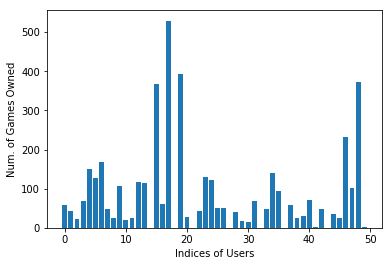

In [30]:
import matplotlib.pyplot as plt

users = set()
items = set()
user_items = defaultdict(lambda: [])
user_playtime_ovarall = defaultdict(int)
item_user_overall = defaultdict(int)
item_playtime_overall = defaultdict(int)
user_playtime_averge = defaultdict(int)
user_item_playtime = defaultdict(int)

for entry in data_users_items:
    u, i = entry['user_id'], entry['items']
    for item in i:
        items.add((item['item_id'], item['item_name']))
        item_user_overall[item['item_name']] += 1
        item_playtime_overall[item['item_name']] += item['playtime_forever']
    users.add(u)
    user_items[u] = i

users = list(users)
items = list(items)
items.sort() 
users.sort()

print('The number of entries within this dataset is: ', len(data_users_items))
print('The number of users within this dataset is: ', len(users))
print('The number of items(games) within this dataset is: ', len(items))

# for each user, num. of games owned 
# X = list(users)[:100]
X = range(50)
Y = [len(user_items[u]) for u in users][:50]
plt.xlabel('Indices of Users')
plt.ylabel('Num. of Games Owned')
plt.bar(X, Y)
plt.savefig('plot1.png')

# average num. of games owned
total = 0
for u in users:
    total += len(user_items[u])

average = float(total) / len(users)
print('The average number of games purchased by all users is', average)

# each user, overall/average time played all games combined
for u in users:
    overall = 0
    
    for i in user_items[u]:
        time = i['playtime_forever']
        overall += time
        # each user, individual time played for each game
        user_item_playtime[(u, i['item_id'])] = time
        
    user_playtime_ovarall[u] = overall
    if len(user_items[u]):
        user_playtime_averge[u] = float(overall) / len(user_items[u])

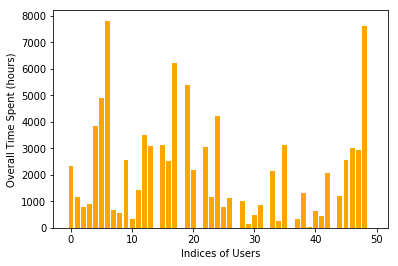

In [28]:
# overall time plot
Y = [(float(user_playtime_ovarall[u]) / 60) for u in users][:50]
plt.xlabel('Indices of Users')
plt.ylabel('Overall Time Spent (hours)')
plt.bar(X, Y, color='orange')
plt.savefig('plot2.png')

<BarContainer object of 20 artists>

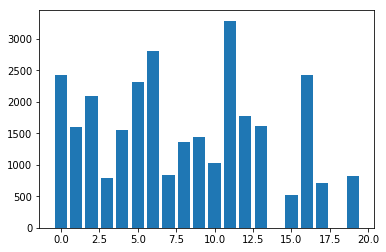

In [16]:
# average time plot
Y = [user_playtime_averge[u] for u in users][:20]
plt.bar(X, Y)

In [7]:
# each game, overall time played by different users
# each game, average time played by different users

In [74]:
# Games; how many users owned them
l = []
for i in item_user_overall:
    l.append((i, item_user_overall[i]))

l.sort(key=lambda x: x[1])
l.reverse()

l_famous = l[:20]

for item in l_famous:
    print(item[0], '&', item[1])

Dota 2 Test & 49571
Counter-Strike: Global Offensive & 43776
Garry's Mod & 43301
Unturned & 38682
Left 4 Dead 2 Beta & 37044
Left 4 Dead 2 & 37044
Terraria & 29239
Warframe & 25807
Portal 2 & 24465
Counter-Strike: Source & 24220
PAYDAY 2 & 23729
The Elder Scrolls V: Skyrim & 22285
Robocraft & 21785
Borderlands 2 & 21029
PlanetSide 2 & 20726
Half-Life 2: Lost Coast & 19826
Heroes & Generals & 19721
Portal & 18774
Half-Life 2 & 18307
War Thunder & 18172


[545892, 785184267, 448366616, 50953961, 142357, 102189423, 154974541, 124027703, 26439449, 112612047, 99763914, 136678626, 23435234, 80428584, 41441966, 345172, 14037711, 5230153, 10857733, 43565714]


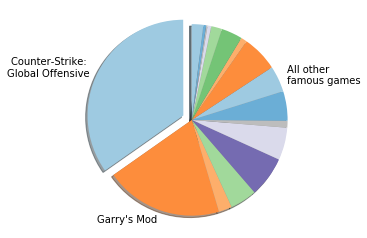

In [80]:
# famous games, overall playtime
import numpy as np

time = []
labels = []
for i in l_famous:
    time.append(item_playtime_overall[i[0]])
    labels.append('')

labels[1] = 'Counter-Strike: \nGlobal Offensive'
labels[2] = l_famous[2][0]
labels[10] = 'All other \nfamous games'
    
print(time)

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([1, 2, 5, 6, 9, 10, 12, 15, 18]))
fig1, ax1 = plt.subplots()
ax1.pie(time, labels=labels, explode=explode, colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('plot3.png')
plt.show()

## Then, we explore the (user, reviews) list

In [75]:
print("Reading data...")
data_user_reviews = list(parseData("./australian_user_reviews.json"))
print("Done.")

Reading data...
Done.


In [76]:
print(data_user_reviews[1])

{'user_id': 'js41637', 'user_url': 'http://steamcommunity.com/id/js41637', 'reviews': [{'funny': '', 'posted': 'Posted June 24, 2014.', 'last_edited': '', 'item_id': '251610', 'helpful': '15 of 20 people (75%) found this review helpful', 'recommend': True, 'review': 'I know what you think when you see this title "Barbie Dreamhouse Party" but do not be intimidated by it\'s title, this is easily one of my GOTYs. You don\'t get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can\'t 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what true fashion and color combinations are.I know this game says for kids but, this is easily for any age range and any age will have a blast playing this.8/8'}, {'funny': '', 'posted': 'Posted September 8, 2013.', 'last_edited': '', 'item_id': '227300', 'helpful': '0 of 1 people (0%) found this review helpful', 'recomm

In [117]:
import string

def month_string_to_number(string):
    m = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr':4,
         'may':5,
         'jun':6,
         'jul':7,
         'aug':8,
         'sep':9,
         'oct':10,
         'nov':11,
         'dec':12
        }
    s = string.strip()[:3].lower()

    try:
        out = m[s]
        return out
    except:
        raise ValueError('Not a month')

# Distribution of recommend/not recommend
recommend = 0
total = 0
punctuation = set(string.punctuation)

review_date = defaultdict(int)
item_review = defaultdict(int)

for u in data_user_reviews:
    for r in u['reviews']:
        total += 1
        if r['recommend']:
            recommend += 1
        
        # Parse time
        r = ''.join([c for c in r['posted'].lower() if not c in punctuation])
        time = r.split()
        if len(time) == 4:
            review_date[(month_string_to_number(time[1]), int(time[3]), 12 * int(time[3]) + month_string_to_number(time[1]))] += 1

print('Overall there are this number of reviews: ', total)
print('Overall there are this number of users who ever did review: ', len(data_user_reviews))
print('Overall the average review done per user: ', float(total) / len(data_user_reviews))
print('Within all reviews, the ones that are recommending the game are: ', float(recommend) / total)

Overall there are this number of reviews:  59305
Overall there are this number of users who ever did review:  25799
Overall the average review done per user:  2.2987325090119772
Within all reviews, the ones that are recommending the game are:  0.8847989208329821


[('2010/10', 2), ('2010/11', 17), ('2010/12', 47), ('2011/1', 25), ('2011/2', 21), ('2011/3', 14), ('2011/4', 12), ('2011/5', 19), ('2011/6', 36), ('2011/7', 110), ('2011/8', 36), ('2011/9', 35), ('2011/10', 38), ('2011/11', 34), ('2011/12', 152), ('2012/1', 44), ('2012/2', 43), ('2012/3', 57), ('2012/4', 35), ('2012/5', 51), ('2012/6', 70), ('2012/7', 229), ('2012/8', 130), ('2012/9', 119), ('2012/10', 124), ('2012/11', 116), ('2012/12', 197), ('2013/1', 197), ('2013/2', 142), ('2013/3', 221), ('2013/4', 202), ('2013/5', 218), ('2013/6', 286), ('2013/7', 342), ('2013/8', 248), ('2013/9', 235), ('2013/10', 265), ('2013/11', 880), ('2013/12', 3556), ('2014/1', 2278), ('2014/2', 1991), ('2014/3', 1635), ('2014/4', 1612), ('2014/5', 1393), ('2014/6', 2770), ('2014/7', 2198), ('2014/8', 1642), ('2014/9', 1490), ('2014/10', 1480), ('2014/11', 1542), ('2014/12', 2080), ('2015/1', 1921), ('2015/2', 1270), ('2015/3', 1323), ('2015/4', 1528), ('2015/5', 1378), ('2015/6', 1869), ('2015/7', 1527)

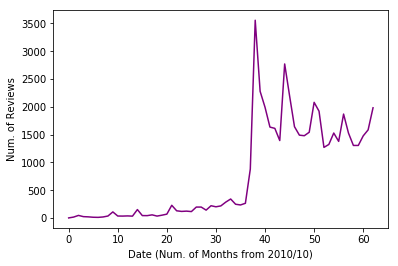

In [118]:
# Time period + distribution regarding time (line chart)

# Create the list
l = []
for i in review_date:
    l.append((i[0], i[1], i[2], review_date[i]))

l.sort(key=lambda x: x[2])

result = []
for i in l:
    result.append(((str(i[1]) + '/' + str(i[0])), i[3]))

print(result)

labels = []
num = []
for i in result:
    labels.append(i[0])
    num.append(i[1])

plt.ylabel('Num. of Reviews')
plt.xlabel('Date (Num. of Months from 2010/10)')
plt.plot(range(63), num, color='purple')
plt.savefig('plot4.png')

In [95]:
# Most/Least recommended item 

In [ ]:
# People find helpful + word count